## Data preprocessing 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('titanic-passengers.csv',sep=';')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.isnull().sum().sum()  # total num of null value 

866

In [6]:
data.isnull().sum()  # column wise null value 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### On remplace les valeurs null , cela peut se faire par ,la moyenne des valeurs, par la médiane , ou encore le mode

In [7]:
print(data["Age"].mean())


29.69911764705882


In [8]:
data["Age"].fillna(data["Age"].mean(),inplace=True)#it will going to replace null value with fillna function with mean
data["Age"].isnull().sum()

0

In [9]:
data["Cabin"].value_counts().max

<bound method NDFrame._add_numeric_operations.<locals>.max of C23 C25 C27    4
B96 B98        4
G6             4
D              3
F33            3
              ..
E77            1
A6             1
C45            1
C54            1
E40            1
Name: Cabin, Length: 147, dtype: int64>

In [10]:
data["Cabin"].fillna("G6",inplace=True)
data.tail()
data["Cabin"].value_counts()

G6             691
C23 C25 C27      4
B96 B98          4
D                3
F33              3
              ... 
E77              1
A6               1
C45              1
C54              1
E40              1
Name: Cabin, Length: 147, dtype: int64

In [11]:
data["Embarked"].isnull().sum()

2

In [12]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
data["Embarked"].fillna("S",inplace=True)
data["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
data.isnull().sum().sum()

0

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


## Data visualisation

<AxesSubplot:title={'center':'Age distribution'}, xlabel='Age', ylabel='Distribution'>

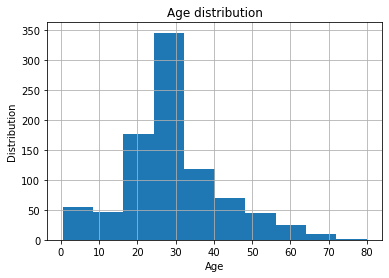

In [16]:
plt.xlabel("Age")
plt.ylabel("Distribution")
plt.title("Age distribution")

data["Age"].hist()

On remarque une concentraction de personne entre 18 et 32 ans 

<AxesSubplot:title={'center':'Sex distribution'}, xlabel='Sex', ylabel='Distribution'>

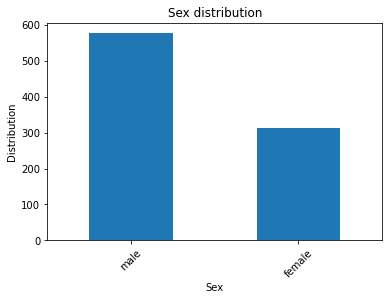

In [17]:
plt.xlabel("Sex")
plt.ylabel("Distribution")
plt.title("Sex distribution")
vc=data["Sex"].value_counts()
vc.plot.bar(rot=45)  #rot rotation x label as well as width 

On remarque une majorité d'homme

<AxesSubplot:title={'center':'Pclass'}, xlabel='Pclass', ylabel='Distribution'>

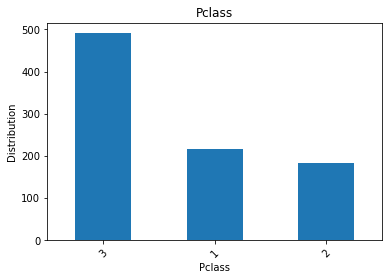

In [18]:
plt.xlabel("Pclass")
plt.ylabel("Distribution")
plt.title("Pclass")
vc=data["Pclass"].value_counts()
vc.plot.bar(rot=45)

On constate que la classe 3 est la plus nombreuse

<AxesSubplot:xlabel='Pclass', ylabel='count'>

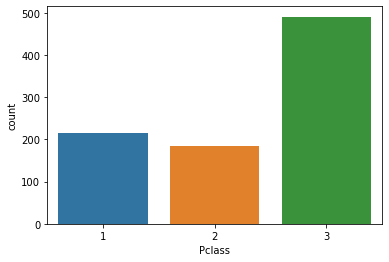

In [19]:
sns.countplot(x='Pclass',data=data)

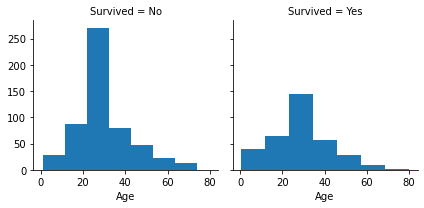

In [20]:
#Correlation entre valeurs
g=sns.FacetGrid(data,col="Survived") #facetgrid-it is used to take input col name and it will going to 
g.map(plt.hist,"Age",bins=7)

<AxesSubplot:xlabel='Survived', ylabel='count'>

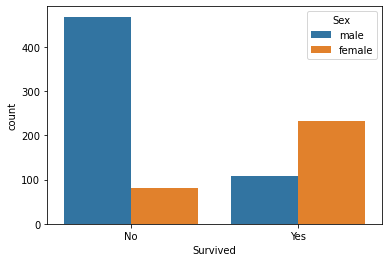

In [21]:
#Corrélation avec Seaborn
sns.countplot(x='Survived',hue='Sex',data=data)

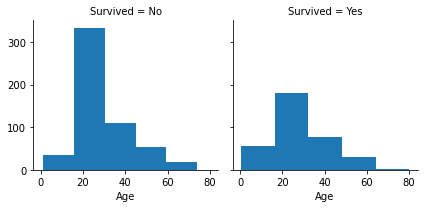

In [22]:
#Age
g=sns.FacetGrid(data,col="Survived")
g.map(plt.hist,"Age",bins=5)

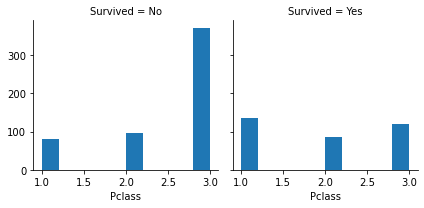

In [23]:
#classe
g=sns.FacetGrid(data,col="Survived")
g.map(plt.hist,"Pclass",bins=10)


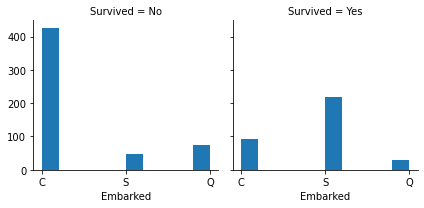

In [24]:
g=sns.FacetGrid(data,col="Survived")
g.map(plt.hist,"Embarked",bins=10)

In [25]:
#Matrice de correlation 
def plot_correlation_map( df ):

    corr = df.corr()
  
    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax,  annot = True, annot_kws = { 'fontsize' : 12 } )

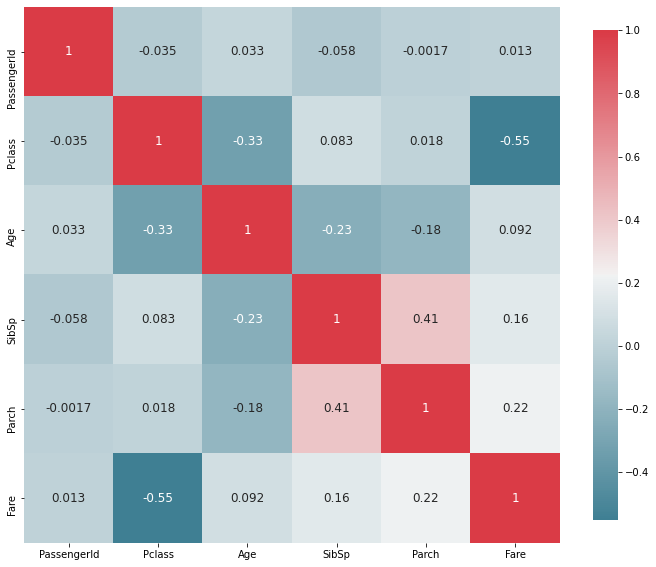

In [26]:
plot_correlation_map( data )

<AxesSubplot:>

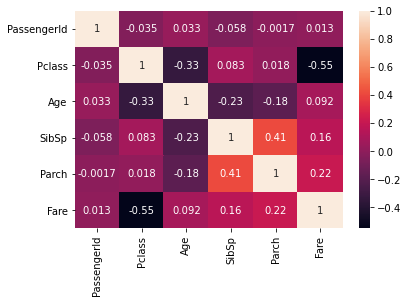

In [27]:
sns.heatmap(data.corr(),annot=True)

On constate une corrélation négative entre Pclass et Fare :ce qui est logique car plus tu payes cher plus tu as une bonne classe 

Pour les survivant on remarque une corrélation positive entre la survie et le sex de la personne 

In [28]:
#Converting Survived to numerical 
cleanup_nums={ "Survived" : {"No":0,"Yes":1}}
data.replace(cleanup_nums,inplace=True)
data["Survived"].value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [29]:
#Converting Sex to numerical 
cleanup_nums={ "Sex" : {"male":0,"female":1}}
data.replace(cleanup_nums,inplace=True)
data["Sex"].value_counts()

0    577
1    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Pclass'>

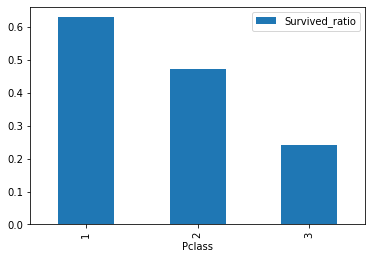

In [30]:
data.groupby(by="Pclass").agg(Survived_ratio=("Survived","mean")).plot(kind='bar')

On constate que 60% des passagers en première classe ont survécu tandis que nous avons 45% et 20% pour les classes 2 et 3

In [31]:
data['title'] = data['Name'].str.split(',|\\.',expand = True)[1] 
data['title'] = data['title'].str.strip()
data['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Capt              1
Lady              1
Jonkheer          1
Don               1
Mme               1
Ms                1
Sir               1
the Countess      1
Name: title, dtype: int64

<AxesSubplot:xlabel='title'>

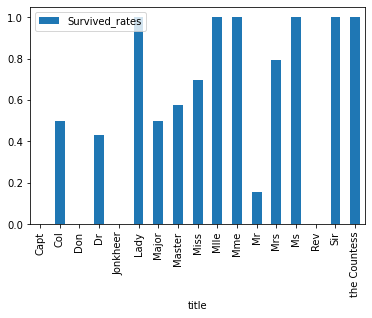

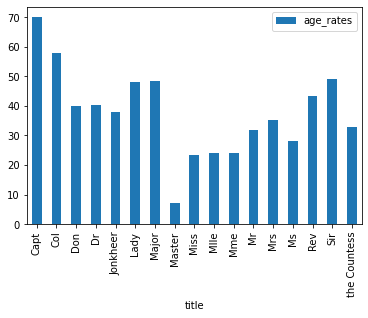

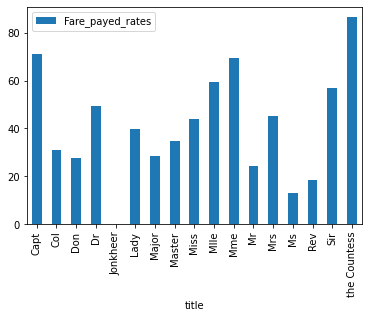

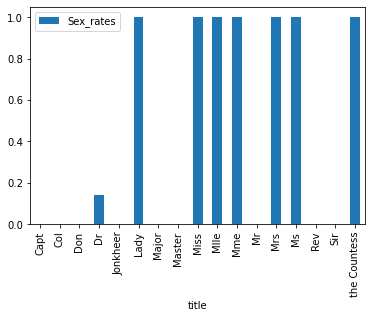

In [32]:
data.groupby(by="title").agg(Survived_rates=("Survived","mean")).plot(kind='bar') 
data.groupby(by="title").agg(age_rates=("Age","mean")).plot(kind='bar')   
data.groupby(by="title").agg(Fare_payed_rates=("Fare","mean")).plot(kind='bar')    
data.groupby(by="title").agg(Sex_rates=("Sex","mean")).plot(kind='bar')

In [33]:
data['title'] = data['Name'].str.split(',|\\.',expand = True)[1] 
data['title'] = data['title'].str.strip()
title_mapping = {"Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                      "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                   "Lady" :      "Royalty",
                  "the Countess": "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mrs",
                    "Mrs" :       "Mrs",
                    "Master" :    "Master" }

data["title"] = data["title"].map(title_mapping)
data['title']

0       Mrs
1       Mrs
2       Mrs
3       Mrs
4       Mrs
       ... 
886     Mrs
887     Mrs
888    Miss
889     Mrs
890    Miss
Name: title, Length: 891, dtype: object

<AxesSubplot:xlabel='title'>

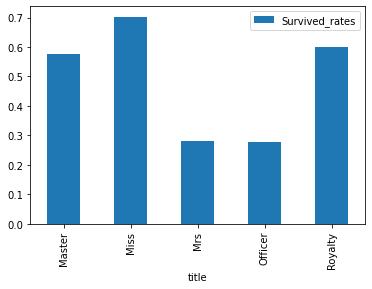

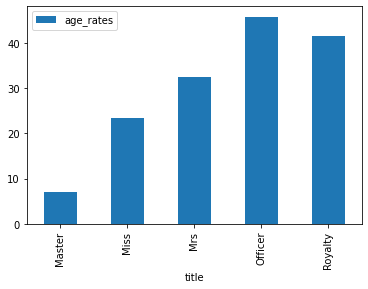

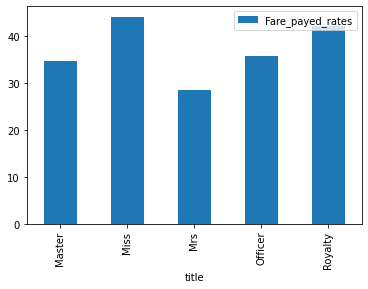

In [34]:
data.groupby(by="title").agg(Survived_rates=("Survived","mean")).plot(kind='bar')
data.groupby(by="title").agg(age_rates=("Age","mean")).plot(kind='bar')   
data.groupby(by="title").agg(Fare_payed_rates=("Fare","mean")).plot(kind='bar')    


## Logistic Regression

In [35]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,G6,S,Mrs
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S,Mrs
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,G6,S,Mrs
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,G6,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = data[['Pclass','Age','Sex','Fare']]
y = data['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)  
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))  #testing model’s performance


Accuracy=0.81


In [37]:
# On peut afficher les valeurs obtenues pour avoir une idée de la précisions du modele
print('y_pred:',y_pred)


y_pred: [1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0
 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0
 0]


In [38]:
print('y_test:',y_test)

y_test: 495    1
648    0
278    1
31     0
255    1
      ..
167    0
306    0
379    1
742    0
10     0
Name: Survived, Length: 223, dtype: int64


In [47]:
# kneighbor classifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#features extraction
x = data[['Pclass','Age','Sex','Fare']]
y = data['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = KNeighborsClassifier()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_predict  = logreg.predict(x_test)  
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test))) 

Accuracy=0.72


In [49]:
print('y_pred:',y_predict)

y_pred: [0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0
 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0
 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1
 0]


In [46]:
print('y_test:',y_test)

y_test: 495    1
648    0
278    1
31     0
255    1
      ..
167    0
306    0
379    1
742    0
10     0
Name: Survived, Length: 223, dtype: int64


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

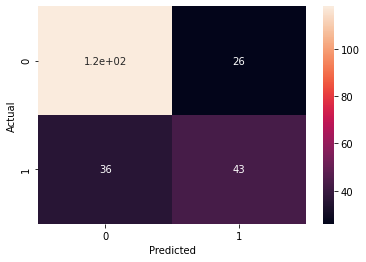

In [40]:
import pandas as pd
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       144
           1       0.62      0.54      0.58        79

    accuracy                           0.72       223
   macro avg       0.69      0.68      0.69       223
weighted avg       0.72      0.72      0.72       223



In [42]:
from sklearn.metrics import roc_curve, roc_auc_score

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

-True Positive Rate
-False Positive Rate



In [43]:
# calculate scores
y_auc = roc_auc_score(y_test, y_pred)

# summarize scores
print('Logistic: ROC AUC=%.3f' % (y_auc))

# calculate roc curves
y_fpr, y_tpr, _ = roc_curve(y_test, y_pred)

Logistic: ROC AUC=0.682


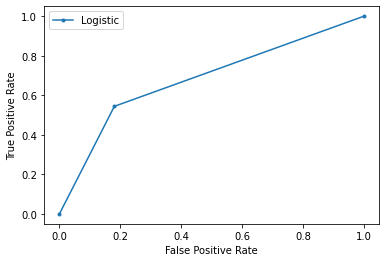

In [44]:

# plot the roc curve for the model
plt.plot(y_fpr, y_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()